#Орехов Александр Николаевич

#Группа СТ-22

#Тема


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

pd.options.display.max_rows = 8

#В результате выполнения этих команд я настраиваете свою среду для анализа данных, импортируя необходимые библиотеки и настраивая параметры отображения.

In [5]:
df = pd.read_csv("/Food_and_Nutrition__.csv") #данная команда загружает данные из указанного CSV файла в DataFrame df, что позволяет нам далее работать с этими данными для анализа или визуализации.

In [6]:
df.head()

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.0,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.0,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.0,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.0,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
4,62,Male,170,85,Sedentary,Vegetarian,2000,80,125.0,16.0,1815,250,30.0,55,Scrambled eggs with whole wheat toast and avocado,Quinoa salad with chickpeas and vegetables,Vegetarian chili with cornbread,Fruit and nut mix,Weight Gain


In [7]:
df.info() #Таким образом, с помощью df.info() я получил полное представление о структуре своего DataFrame, включая количество записей, количество столбцов, типы данных и наличие пропущенных значений.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 15  Lunch Suggestion     

In [8]:
df #Таким образом, я создал и представили DataFrame, содержащий важную информацию о здоровье и питании людей, что может быть использовано для дальнейшего анализа и разработки рекомендаций.

,Ages,Gender,Height,Weight,Activity Level,Dietary Preference,Daily Calorie Target,Protein,Sugar,Sodium,Calories,Carbohydrates,Fiber,Fat,Breakfast Suggestion,Lunch Suggestion,Dinner Suggestion,Snack Suggestion,Disease
0,25,Male,180,80,Moderately Active,Omnivore,2000,120,125.0,24.0,2020,250,30.00,60,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Salmon with roasted vegetables,Greek yogurt with fruit,Weight Gain
1,32,Female,165,65,Lightly Active,Vegetarian,1600,80,100.0,16.0,1480,200,24.00,40,Tofu scramble with veggies,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Apple with almond butter,"Weight Gain, Hypertension, Heart Disease"
2,48,Male,175,95,Sedentary,Vegan,2200,100,150.0,20.0,2185,300,36.00,65,Tofu and veggie breakfast burrito,Black bean burger on a whole wheat bun,Lentil and vegetable curry,Trail mix,Weight Gain
3,55,Female,160,70,Very Active,Omnivore,2500,140,175.0,28.0,2680,350,42.00,80,Greek yogurt with granola and fruit,Chicken and vegetable stir-fry,Turkey chili with brown rice,Banana with peanut butter,Weight Gain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,38,Male,150,76,Very Active,Vegan,2109,158,105.0,31.6,2102,210,25.20,70,Oatmeal with berries and nuts,Grilled chicken salad with mixed greens,Lentil and vegetable curry,Apple with almond butter,Weight Gain
1695,57,Male,165,73,Very Active,Vegan,2555,191,127.5,38.2,2549,255,30.60,85,Smoothie with protein powder,Chicken and vegetable stir-fry,Vegetable stir-fry with brown rice,Fruit and nut mix,Weight Gain
1696,40,Male,166,91,Extremely Active,Vegan,3329,249,166.0,49.8,3314,332,39.84,110,Scrambled eggs with whole wheat toast,Lentil soup with whole wheat bread,Vegetable stir-fry with brown rice,Banana with peanut butter,Weight Gain
1697,54,Female,198,75,Sedentary,Vegetarian,1867,140,93.0,28.0,1862,186,22.32,62,Scrambled eggs with whole wheat toast,Chicken and vegetable stir-fry,Pasta with marinara sauce and veggies,Banana with peanut butter,Weight Gain


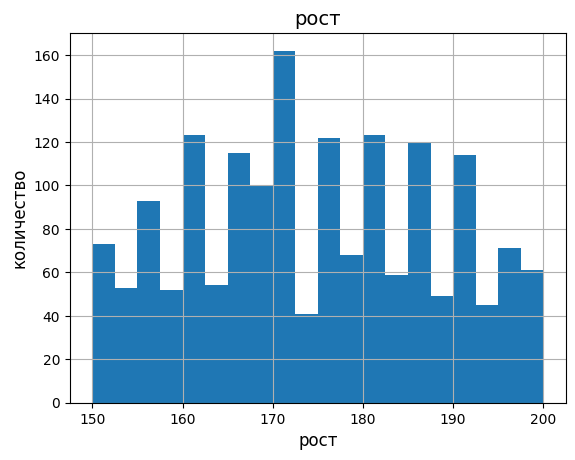

In [17]:
#Строим графики, я визуализирую распределение роста в своем наборе данных, что позволяет нам лучше понять, как распределены значения роста среди людей в моем DataFrame. Гистограмма может помочь выявить тенденции, такие как наличие пиков (например, наиболее распространенные значения роста) или ассиметрии в распределении.
df['Height'].hist(bins=20)
plt.title("рост", fontsize = 14)
plt.ylabel('количество', fontsize = 12) # Подпись оси Y
plt.xlabel('рост', fontsize = 12) # Подпись оси x
plt.show()

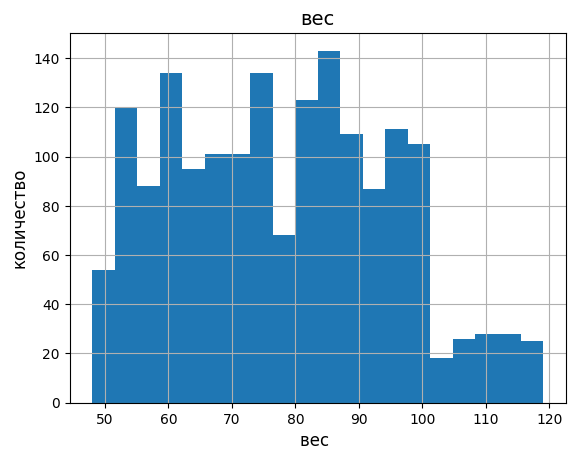

In [19]:
#Строим графики, я визуализирую распределение веса в своем наборе данных, что позволяет нам лучше понять, как распределены значения веса среди людей в моем DataFrame.
df['Weight'].hist(bins=20)
plt.title("вес", fontsize = 14)
plt.ylabel('количество', fontsize = 12) # Подпись оси Y
plt.xlabel('вес ', fontsize = 12) # Подпись оси x
plt.show()

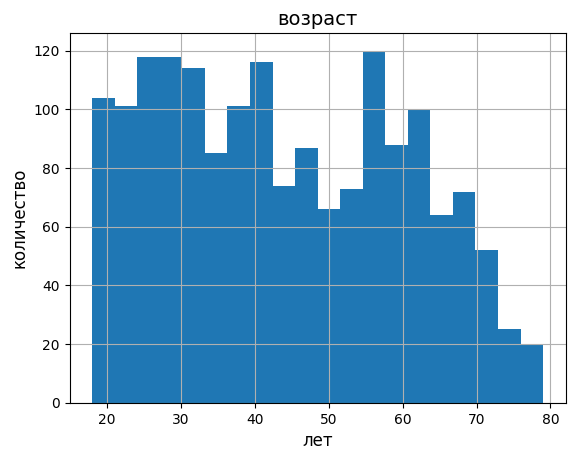

In [9]:
#Строим графики, я визуализирую распределение возраста в своем наборе данных, что позволяет нам лучше понять, как распределены значения возраста среди людей в моем DataFrame.
df['Ages'].hist(bins=20)
plt.title("возраст", fontsize = 14)
plt.ylabel('количество', fontsize = 12) # Подпись оси Y
plt.xlabel('лет', fontsize = 12) # Подпись оси x
plt.show()

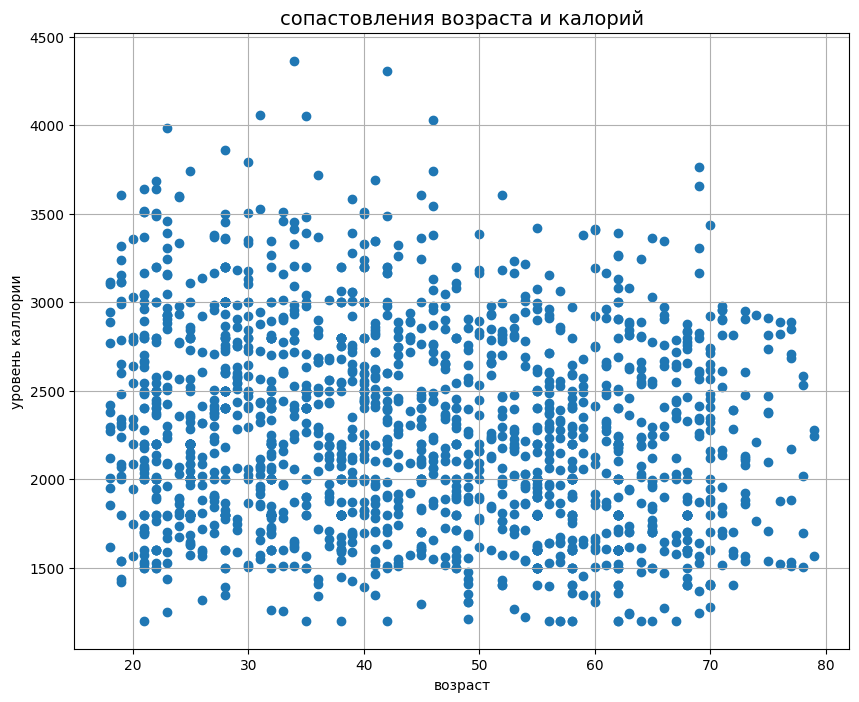

In [16]:
#Построение диаграммы рассеиния признаков, визуальный анализ
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(y = df['Daily Calorie Target'], x = df['Ages'])
plt.title("сопастовления возраста и калорий", fontsize = 14)
plt.ylabel("уровень каллории")
plt.xlabel("возраст")
plt.grid(True)
plt.show()

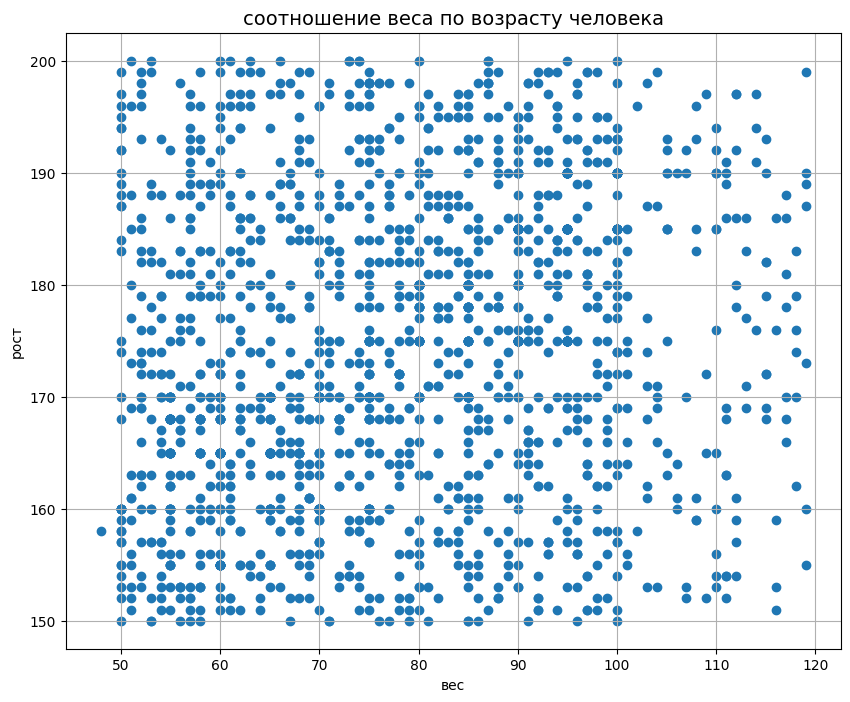

In [12]:
#Строим графики, я визуализирую распределение веса в своем наборе данных, что позволяет нам лучше понять, как распределены значения веса среди людей в моем DataFrame.
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(y = df['Height'], x = df['Weight'])
plt.title("соотношение веса по возрасту человека", fontsize = 14)
plt.ylabel("рост")
plt.xlabel("вес")
plt.grid(True)
plt.show()

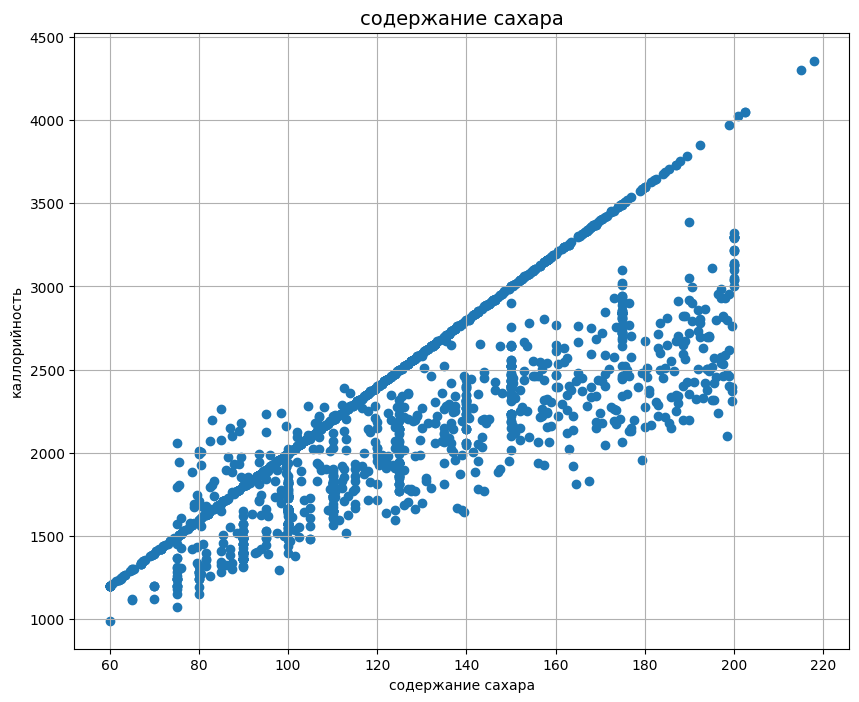

In [20]:

#Строим графики, я визуализирую содержание сахара в своем наборе данных
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(y = df['Calories'], x = df['Sugar'])
plt.title("содержание сахара", fontsize = 14)
plt.ylabel("каллорийность")
plt.xlabel("содержание сахара")
plt.grid(True)
plt.show()

In [ ]:
#я создал и проанализировал объект DataFrame в библиотеке Pandas, который содержит данные о 1,698 записях, касающихся различных аспектов питания и здоровья отдельных лиц
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1698 entries, 0 to 1697
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ages                  1698 non-null   int64  
 1   Gender                1698 non-null   object 
 2   Height                1698 non-null   int64  
 3   Weight                1698 non-null   int64  
 4   Activity Level        1698 non-null   object 
 5   Dietary Preference    1698 non-null   object 
 6   Daily Calorie Target  1698 non-null   int64  
 7   Protein               1698 non-null   int64  
 8   Sugar                 1698 non-null   float64
 9   Sodium                1698 non-null   float64
 10  Calories              1698 non-null   int64  
 11  Carbohydrates         1698 non-null   int64  
 12  Fiber                 1698 non-null   float64
 13  Fat                   1698 non-null   int64  
 14  Breakfast Suggestion  1698 non-null   object 
 15  Lunch Suggestion     

In [ ]:
#Таким образом, я анализирую взаимосвязи между возрастом, ростом и весом в моем наборе данных, что может помочь в дальнейшем анализе и интерпретации данных о здоровье и питании.
df[["Ages","Height","Weight"]].corr()

,Ages,Height,Weight
Ages,1.000000,-0.064644,0.065390
Height,-0.064644,1.000000,0.182363
Weight,0.065390,0.182363,1.000000


In [ ]:
df[["Protein","Sugar","Sodium"]].corr()

,Protein,Sugar,Sodium
Protein,1.000000,0.408783,1.000000
Sugar,0.408783,1.000000,0.408783
Sodium,1.000000,0.408783,1.000000


In [ ]:
df[["Daily Calorie Target","Calories","Fat"]].corr()

,Daily Calorie Target,Calories,Fat
Daily Calorie Target,1.000000,0.825169,0.730332
Calories,0.825169,1.000000,0.866884
Fat,0.730332,0.866884,1.000000


In [ ]:
#Импортируя LinearRegression, я готовлю себя к использованию мощного инструмента для анализа данных и построения предсказательных моделей с помощью линейной регрессии в Python.
from sklearn.linear_model import LinearRegression

In [ ]:
#В результате выполнения lm = LinearRegression() я подготовил объект, который будет использоваться для построения и анализа линейной регрессионной модели. Этот объект является основой для выполнения всех дальнейших шагов в процессе построения модели и анализа данных.
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
X = df[['Calories']]
Y = df['Fat']

In [ ]:
lm.fit(X,Y)

LinearRegression()

In [ ]:
Yhat=lm.predict(X)
Yhat[0:5]
#Таким образом, команда Yhat = lm.predict(X) позволяет нам получить прогнозы на основе вашей обученной модели линейной регрессии, а Yhat[0:5] позволяет вам быстро просмотреть первые пять предсказанных значений.

array([63.96109466, 46.39452808, 69.32865667, 85.43134271, 57.2923055 ])

In [ ]:
lm.intercept_

-1.7508766221208418

In [ ]:
lm.coef_

array([0.03253068])

In [ ]:
#Y=75.003+0.07x - уравнение парной регрессии между Ages и Weight

In [ ]:
Z = df[['Fat', 'Fiber']]

In [ ]:
lm.fit(Z, df['Calories'])

LinearRegression()

In [ ]:
lm.intercept_

29.437149486686394

In [ ]:
lm.coef_

array([16.2039136 , 34.25905453])

In [ ]:
#Y=29.4+16.2x+34.2x3 - уравнение множественной регрессии между Ages и Weight

In [ ]:
#нормализация данных простым масштабированием объектов
df["Ages"]=df["Ages"]/df["Ages"].max()
df["Height"]=df["Height"]/df["Height"].max()
df["Weight"]=df["Weight"]/df["Weight"].max()

Вывод: